In [6]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

# Filtering for Pakistan

In [7]:
df_PK = df[df['job_country']=='Pakistan'].dropna(subset=['salary_year_avg']).copy()

In [9]:
# Getting Job Titles

job_titles = df_PK['job_title_short'].value_counts().index[:6].tolist()

# Data Frames of the Job Titles

df_top6 = df_PK[df_PK['job_title_short'].isin(job_titles)]

# Ordering the Jobs based on the median salary

job_order = df_top6.groupby('job_title_short')['salary_year_avg'].agg('median').sort_values(ascending=False).index

['Data Engineer',
 'Machine Learning Engineer',
 'Data Scientist',
 'Business Analyst',
 'Data Analyst',
 'Software Engineer']

## Salary Distribution in the Pakistan

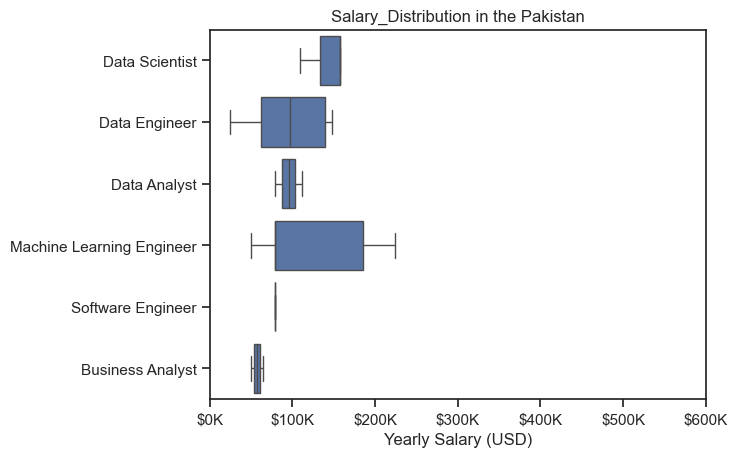

In [18]:
sns.set_theme(style='ticks')
sns.boxplot(data=df_top6, x='salary_year_avg', y='job_title_short', order= job_order)

plt.title('Salary Distribution in the Pakistan')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')
plt.xlim(0,600000)

x_ticks = plt.FuncFormatter(lambda x,pos: f'${int(x/1000)}K')
ax=plt.gca()
ax.xaxis.set_major_formatter(x_ticks)